Generar una señal impulso que vaya de n=-10 a n=10, con el impulso en n=0 y desplazarlo
temporalmente 5 muestras. Generar otra señal impulso que vaya de n=-10 a n=10, con
el impulso en n=0 y esplazarlo temporalmente -5 muestras. Sumar ambos impulsos y
graficar cada paso. Guardar el resultado de la suma en formato numpy.

In [3]:
import generate as gen
import modify as mod
import plot as pl
import numpy as np

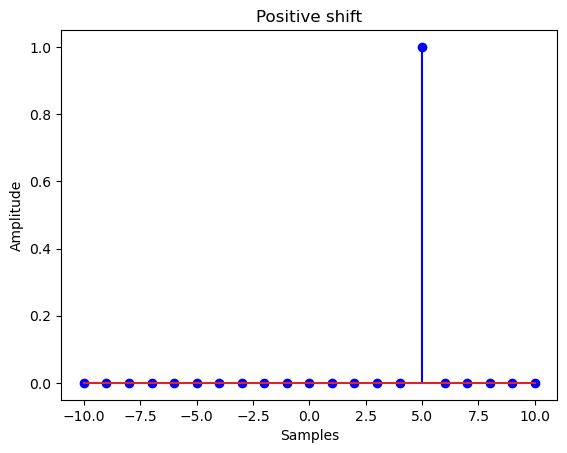

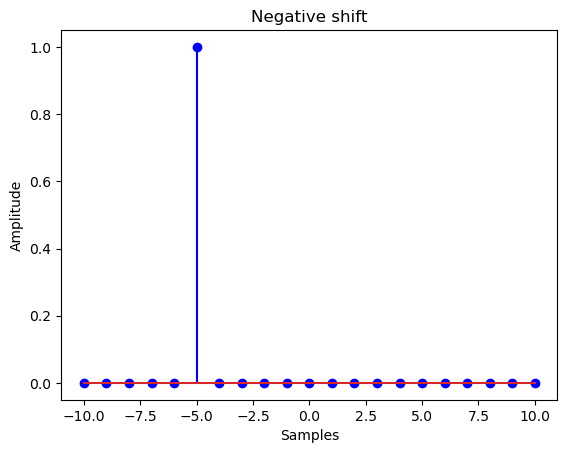

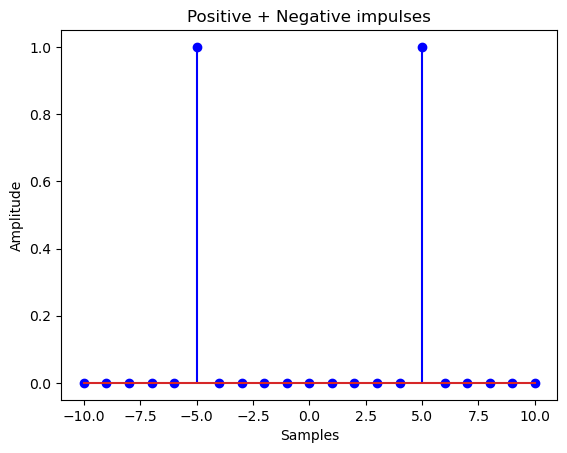

In [4]:
x, y = gen.unit_impulse()

y_1 = mod.shift_signal(y, 5, shift_sample = True)
y_2 = mod.shift_signal(y, -5, shift_sample = True)
y_sum = mod.operate_signal(y_1, y_2, "add")

pl.stem_signal(x, y_1, title="Positive shift")
pl.stem_signal(x, y_2, title="Negative shift")
pl.stem_signal(x, y_sum, title="Positive + Negative impulses", npy_save=True) # to save change npy_save=True

Generar una señal aleatoria que vaya de n=0 a n=25, con media=1 y desvio=2. Generar
otra señal de tipo exponencial, que vaya de n=0 a n=25, con base=3. Multiplicar ambas
señales y graficar el resultado. Guardar el resultado de la suma en formato numpy.

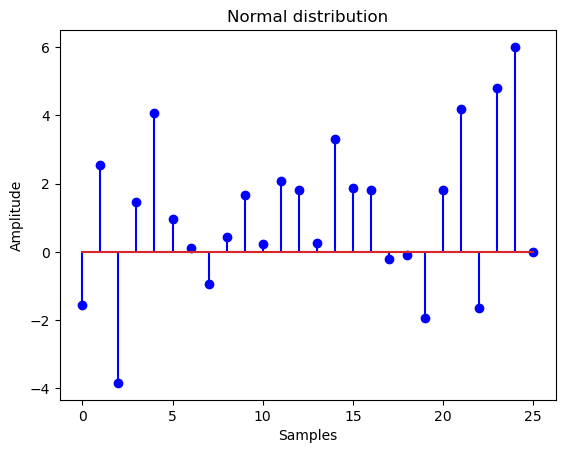

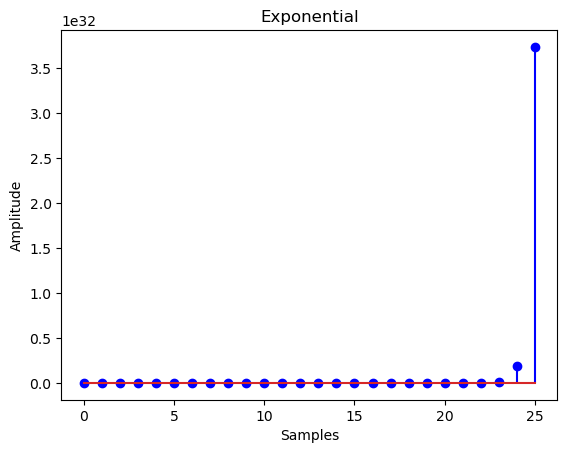

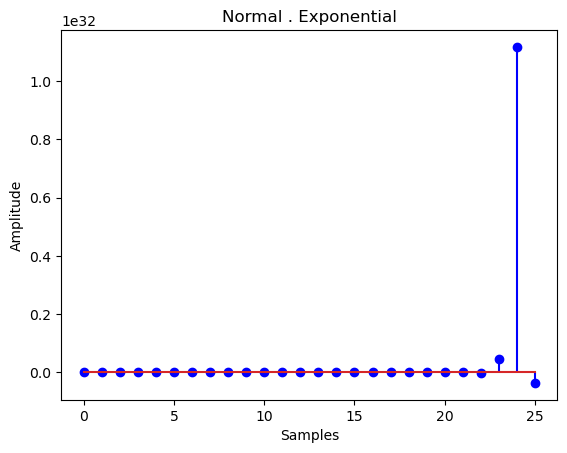

In [6]:
# Generate the signals
samples, norm = gen.normal_signal(0,25,1,2)
samples, exp = gen.exponential_signal(0,25,1,3)

# Multiply the signals
mult = mod.operate_signal(norm, exp, "mult")

# Plot the signals
pl.stem_signal(samples, norm, title="Normal distribution")
pl.stem_signal(samples, exp, title="Exponential")
pl.stem_signal(samples, mult, title="Normal . Exponential", npy_save=True)

Generar un pulso triangular que vaya de n=-10 a n=10, con un factor=5. Generar otra
señal de tipo aleatorio que vaya de n=-10 a n=10, con media=0 y desvio=1. Sumar ambas
señales y graficar cada paso. Guardar el resultado de la suma en formato numpy.

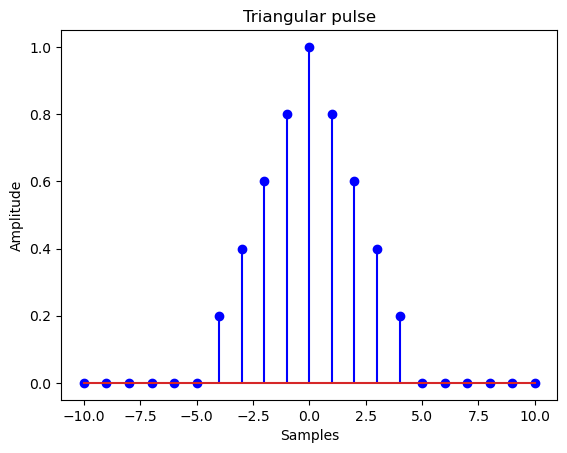

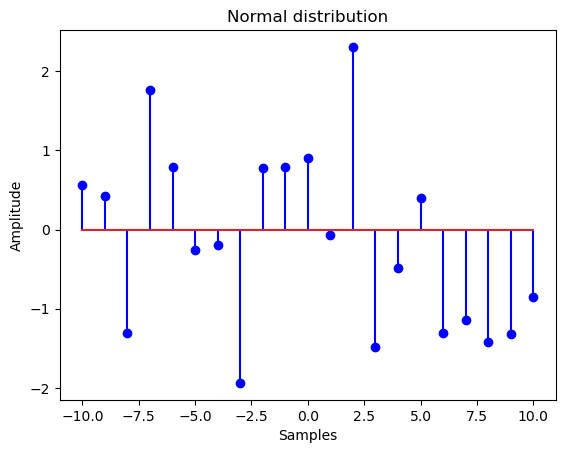

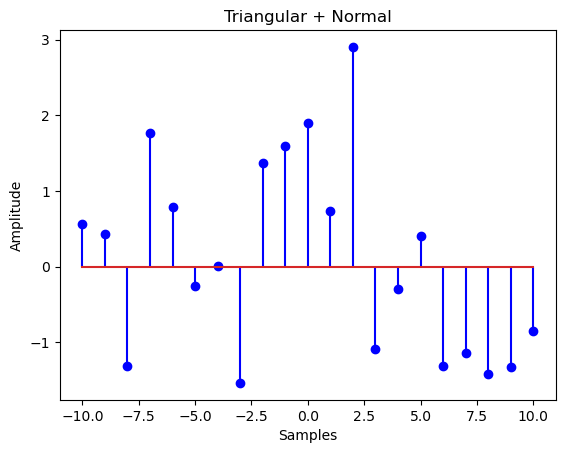

In [7]:
# Generate the signals
samples, triangle = gen.triangular_pulse(-10,10,1,10)
samples, norm = gen.normal_signal(-10,10,0,1)

# Add the signals
addition = mod.operate_signal(triangle, norm, "add")

# Plot the signals
pl.stem_signal(samples, triangle, title="Triangular pulse")
pl.stem_signal(samples, norm, title="Normal distribution")
pl.stem_signal(samples, addition, title="Triangular + Normal", npy_save=True)

Generar un escalón unitario que vaya desde n=-5 a n=15, con el escalón iniciando en
n=5. Generar un pulso unitario que vaya de n=-15 a n=15 con el pulso iniciando en n=-
10 y terminando en n=10. Sumar ambas señales (escalón + pulso). Graficar y guardar el
resultado en formato numpy.

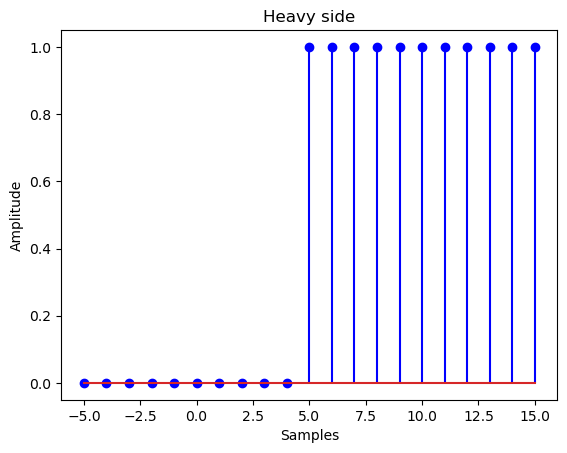

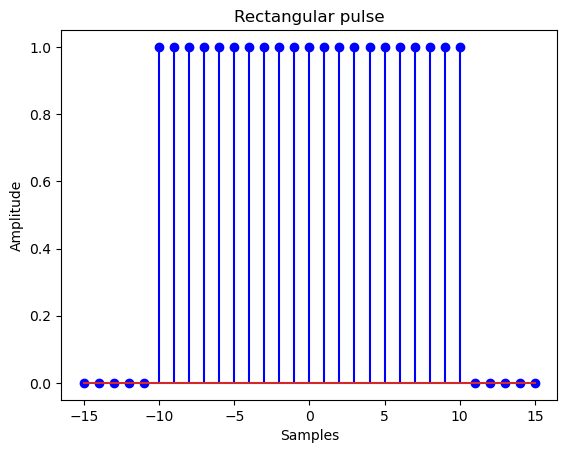

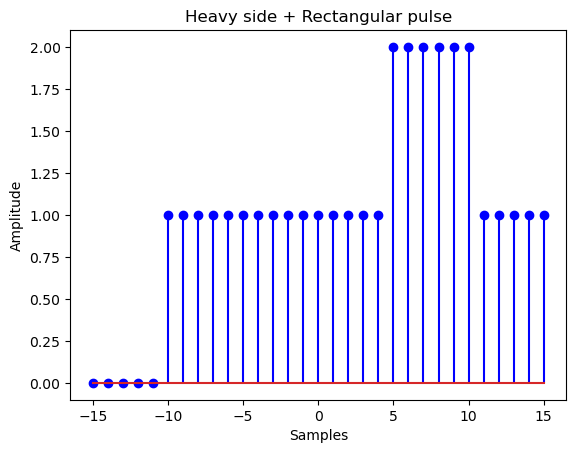

In [3]:
# Generate the signals
n_1, hs = gen.heavy_side(-5, 15)
n_2, pulse = gen.rectangular_pulse(20, -15, 15)

# Shift the heavy side
hs = mod.shift_signal(hs, sample_shift=5, shift_sample=True)

# Add zeros to get the same dimentions 
import numpy as np
hs_new = np.concatenate((np.zeros((10,)), hs))

# Add the signals
addition = mod.operate_signal(pulse, hs_new, "add")

# Plot the signals
pl.stem_signal(n_1, hs, title="Heavy side")
pl.stem_signal(n_2, pulse, title="Rectangular pulse")
pl.stem_signal(n_2, addition, title="Heavy side + Rectangular pulse", npy_save=True)

Cargar la señal guardada del inciso anterior e invertirla temporalmente. Cargar la señal resultante del primer inciso. Convolucionar estas dos señales cargadas y graficar el resultado. Guardar el grafico en formato png.

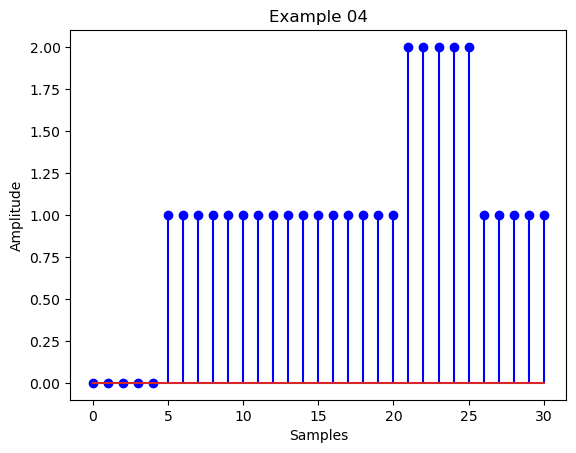

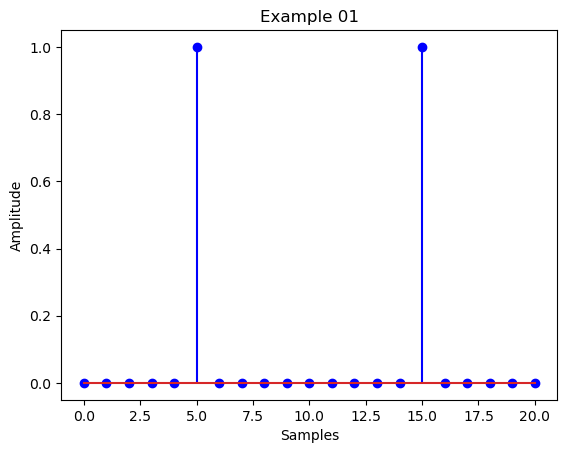

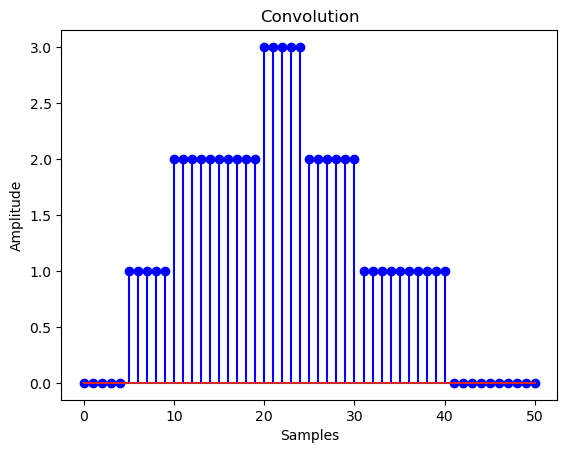

In [9]:
# Load the signals
signal_04 = np.load("Heavy side + Rectangular pulse.npy")
signal_01 = np.load("Positive + Negative impulses.npy")

# Modify signals
signal_04 = mod.invert_signal(signal_04, invert_time=True)
conv = mod.operate_signal(signal_04, signal_01, "convo")
samples = range(len(conv))

# Print signals
pl.load_stem("Heavy side + Rectangular pulse.npy", title="Example 04")
pl.load_stem("Positive + Negative impulses.npy", title="Example 01")
pl.stem_signal(samples, conv, title="Convolution", png_save=True)